# DKI constraints



In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [2]:
var('w1 w2 w3 w4 w5 w6 w7 w8 w9 w10 w11 w12 w13 w14 w15 w16 w17 w18 w19 w20 w21 w22')

# h(q, s)
var('x y z')  # i.e. vars for wavevector q (called 'x' in Tom's work, he writes h(x, s)); same as Magnani
var('a b c')  # i.e. vars for dummy vector s, same dimension as q

# remember, that h(q,s) = s^T . Hessian_f(q) . s
# so h(q,s) is a poly of both q and s

(a, b, c)

In [3]:
f = +1 * w1 * x^2 \
    -2 * w2 * x * y \
    +1 * w3 * y^2 \
    -2 * w4 * x * z \
    -2 * w5 * y * z \
    +1 * w6 * z^2 \
    +1/6 * w7 * x^4 \
    +1/6 * w8 * y^4 \
    +1/6 * w9 * z^4 \
    +4/6 * w10 * x^3 * y \
    +4/6 * w11 * x^3 * z \
    +4/6 * w12 * y^3 * x \
    +4/6 * w13 * y^3 * z \
    +4/6 * w14 * z^3 * x \
    +4/6 * w15 * z^3 * y \
    +1 * w16 * x^2 * y^2 \
    +1 * w17 * x^2 * z^2 \
    +1 * w18 * y^2 * z^2 \
    +2 * w19 * x^2 * y * z \
    +2 * w20 * y^2 * x * z \
    +2 * w21 * z^2 * x * y \
    +1 * w22


In [4]:
f = matrix([[derivative(f,x,2), derivative(derivative(f,x),y), derivative(derivative(f,x),z)],
            [derivative(derivative(f,y),x), derivative(f,y,2), derivative(derivative(f,y),z)],
            [derivative(derivative(f,z),x), derivative(derivative(f,z),y), derivative(f,z,2)]])

In [5]:
f

[ 2*w7*x^2 + 4*w10*x*y + 2*w16*y^2 + 4*w11*x*z + 4*w19*y*z + 2*w17*z^2 + 2*w1 2*w10*x^2 + 4*w16*x*y + 2*w12*y^2 + 4*w19*x*z + 4*w20*y*z + 2*w21*z^2 - 2*w2 2*w11*x^2 + 4*w19*x*y + 2*w20*y^2 + 4*w17*x*z + 4*w21*y*z + 2*w14*z^2 - 2*w4]
[2*w10*x^2 + 4*w16*x*y + 2*w12*y^2 + 4*w19*x*z + 4*w20*y*z + 2*w21*z^2 - 2*w2  2*w16*x^2 + 4*w12*x*y + 2*w8*y^2 + 4*w20*x*z + 4*w13*y*z + 2*w18*z^2 + 2*w3 2*w19*x^2 + 4*w20*x*y + 2*w13*y^2 + 4*w21*x*z + 4*w18*y*z + 2*w15*z^2 - 2*w5]
[2*w11*x^2 + 4*w19*x*y + 2*w20*y^2 + 4*w17*x*z + 4*w21*y*z + 2*w14*z^2 - 2*w4 2*w19*x^2 + 4*w20*x*y + 2*w13*y^2 + 4*w21*x*z + 4*w18*y*z + 2*w15*z^2 - 2*w5  2*w17*x^2 + 4*w21*x*y + 2*w18*y^2 + 4*w14*x*z + 4*w15*y*z + 2*w9*z^2 + 2*w6]

In [6]:
# this is the dummy vector 's'
dum = vector([a, b, c])

In [7]:
h = (dum * f * dum).expand()

In [8]:
h

4*a*b*w10*x^2 + 4*a*c*w11*x^2 + 2*b^2*w16*x^2 + 2*c^2*w17*x^2 + 4*b*c*w19*x^2 + 2*a^2*w7*x^2 + 4*a^2*w10*x*y + 4*b^2*w12*x*y + 8*a*b*w16*x*y + 8*a*c*w19*x*y + 8*b*c*w20*x*y + 4*c^2*w21*x*y + 4*a*b*w12*y^2 + 4*b*c*w13*y^2 + 2*a^2*w16*y^2 + 2*c^2*w18*y^2 + 4*a*c*w20*y^2 + 2*b^2*w8*y^2 + 4*a^2*w11*x*z + 4*c^2*w14*x*z + 8*a*c*w17*x*z + 8*a*b*w19*x*z + 4*b^2*w20*x*z + 8*b*c*w21*x*z + 4*b^2*w13*y*z + 4*c^2*w15*y*z + 8*b*c*w18*y*z + 4*a^2*w19*y*z + 8*a*b*w20*y*z + 8*a*c*w21*y*z + 4*a*c*w14*z^2 + 4*b*c*w15*z^2 + 2*a^2*w17*z^2 + 2*b^2*w18*z^2 + 4*a*b*w21*z^2 + 2*c^2*w9*z^2 + 2*a^2*w1 - 4*a*b*w2 + 2*b^2*w3 - 4*a*c*w4 - 4*b*c*w5 + 2*c^2*w6

In [10]:
# NOTE: it could be, that we still have too many options here... 

# all monomials up to order 2
#e = vector([x, y, z, a, b, c,
#            x^2, y^2, z^2, a^2, b^2, c^2,
#            x*y, x*z, y*z,
#            a*b, a*c, b*c,
#            x*a, x*b, x*c,
#            y*a, y*b, y*c,
#            z*a, z*b, z*c])

# I thought we had to include all monomials, but looks like we could represent h with only these
# Tom's A matrices are 12 x 12 so maybe this is right after all!
# 
e = vector([a, b, c,
            x*a, x*b, x*c,
            y*a, y*b, y*c,
            z*a, z*b, z*c])

In [61]:
# create a dense matrix of elements d_ij

SZ = len(e)
dense = matrix(SR, SZ, SZ)

for j in range(SZ):
    for i in range(SZ):
        ttt = var('d_' + str(i + 1) + '_' + str(j + 1))
        dense[i, j] = ttt


In [62]:
# apply basis
res = (e * dense * e).expand()
res

a^2*d_4_4*x^2 + a*b*d_4_5*x^2 + a*c*d_4_6*x^2 + a*b*d_5_4*x^2 + b^2*d_5_5*x^2 + b*c*d_5_6*x^2 + a*c*d_6_4*x^2 + b*c*d_6_5*x^2 + c^2*d_6_6*x^2 + a^2*d_4_7*x*y + a*b*d_4_8*x*y + a*c*d_4_9*x*y + a*b*d_5_7*x*y + b^2*d_5_8*x*y + b*c*d_5_9*x*y + a*c*d_6_7*x*y + b*c*d_6_8*x*y + c^2*d_6_9*x*y + a^2*d_7_4*x*y + a*b*d_7_5*x*y + a*c*d_7_6*x*y + a*b*d_8_4*x*y + b^2*d_8_5*x*y + b*c*d_8_6*x*y + a*c*d_9_4*x*y + b*c*d_9_5*x*y + c^2*d_9_6*x*y + a^2*d_7_7*y^2 + a*b*d_7_8*y^2 + a*c*d_7_9*y^2 + a*b*d_8_7*y^2 + b^2*d_8_8*y^2 + b*c*d_8_9*y^2 + a*c*d_9_7*y^2 + b*c*d_9_8*y^2 + c^2*d_9_9*y^2 + a^2*d_10_4*x*z + a*b*d_10_5*x*z + a*c*d_10_6*x*z + a*b*d_11_4*x*z + b^2*d_11_5*x*z + b*c*d_11_6*x*z + a*c*d_12_4*x*z + b*c*d_12_5*x*z + c^2*d_12_6*x*z + a^2*d_4_10*x*z + a*b*d_4_11*x*z + a*c*d_4_12*x*z + a*b*d_5_10*x*z + b^2*d_5_11*x*z + b*c*d_5_12*x*z + a*c*d_6_10*x*z + b*c*d_6_11*x*z + c^2*d_6_12*x*z + a^2*d_10_7*y*z + a*b*d_10_8*y*z + a*c*d_10_9*y*z + a*b*d_11_7*y*z + b^2*d_11_8*y*z + b*c*d_11_9*y*z + a*c*d_12_7*y*z +

In [64]:
# use dense matrix of ones, in order to determin all possible monomial_i x monomial_j combinations
ones = matrix.ones(SZ, SZ)

all_terms = (e * ones * e ).expand()

mylist = all_terms.operands()
mylist

[a^2*x^2,
 2*a*b*x^2,
 b^2*x^2,
 2*a*c*x^2,
 2*b*c*x^2,
 c^2*x^2,
 2*a^2*x*y,
 4*a*b*x*y,
 2*b^2*x*y,
 4*a*c*x*y,
 4*b*c*x*y,
 2*c^2*x*y,
 a^2*y^2,
 2*a*b*y^2,
 b^2*y^2,
 2*a*c*y^2,
 2*b*c*y^2,
 c^2*y^2,
 2*a^2*x*z,
 4*a*b*x*z,
 2*b^2*x*z,
 4*a*c*x*z,
 4*b*c*x*z,
 2*c^2*x*z,
 2*a^2*y*z,
 4*a*b*y*z,
 2*b^2*y*z,
 4*a*c*y*z,
 4*b*c*y*z,
 2*c^2*y*z,
 a^2*z^2,
 2*a*b*z^2,
 b^2*z^2,
 2*a*c*z^2,
 2*b*c*z^2,
 c^2*z^2,
 2*a^2*x,
 4*a*b*x,
 2*b^2*x,
 4*a*c*x,
 4*b*c*x,
 2*c^2*x,
 2*a^2*y,
 4*a*b*y,
 2*b^2*y,
 4*a*c*y,
 4*b*c*y,
 2*c^2*y,
 2*a^2*z,
 4*a*b*z,
 2*b^2*z,
 4*a*c*z,
 4*b*c*z,
 2*c^2*z,
 a^2,
 2*a*b,
 b^2,
 2*a*c,
 2*b*c,
 c^2]

In [66]:
# now loop over this list, but strip out the numbers at the front, leaving only monomials_i x monomial_j

TERMS = []
tmp = None
for i in mylist:
    
    if "*" in str(i):
        tmp_split = str(i).split("*")

        try:
            int(tmp_split[0])
            tmp = "*".join(str(i).split("*")[1:])
        except:
            tmp = str(i)
    else:
        tmp = str(i)
    #print(tmp)
    TERMS.append(tmp)
TERMS

['a^2*x^2',
 'a*b*x^2',
 'b^2*x^2',
 'a*c*x^2',
 'b*c*x^2',
 'c^2*x^2',
 'a^2*x*y',
 'a*b*x*y',
 'b^2*x*y',
 'a*c*x*y',
 'b*c*x*y',
 'c^2*x*y',
 'a^2*y^2',
 'a*b*y^2',
 'b^2*y^2',
 'a*c*y^2',
 'b*c*y^2',
 'c^2*y^2',
 'a^2*x*z',
 'a*b*x*z',
 'b^2*x*z',
 'a*c*x*z',
 'b*c*x*z',
 'c^2*x*z',
 'a^2*y*z',
 'a*b*y*z',
 'b^2*y*z',
 'a*c*y*z',
 'b*c*y*z',
 'c^2*y*z',
 'a^2*z^2',
 'a*b*z^2',
 'b^2*z^2',
 'a*c*z^2',
 'b*c*z^2',
 'c^2*z^2',
 'a^2*x',
 'a*b*x',
 'b^2*x',
 'a*c*x',
 'b*c*x',
 'c^2*x',
 'a^2*y',
 'a*b*y',
 'b^2*y',
 'a*c*y',
 'b*c*y',
 'c^2*y',
 'a^2*z',
 'a*b*z',
 'b^2*z',
 'a*c*z',
 'b*c*z',
 'c^2*z',
 'a^2',
 'a*b',
 'b^2',
 'a*c',
 'b*c',
 'c^2']

In [71]:
# the basic logic of how to determine which d_i_j elements correspond to which w  

for term in TERMS:
    tmp = res.coefficient(SR(term))  # looking in res = e.dense.e for the corresponding factor
    tmp_h = h.coefficient(SR(term)) 

    print("(", tmp, ") *", term)
    print("(", tmp_h, ") *", term)
    print()

( d_4_4 ) * a^2*x^2
( 2*w7 ) * a^2*x^2

( d_4_5 + d_5_4 ) * a*b*x^2
( 4*w10 ) * a*b*x^2

( d_5_5 ) * b^2*x^2
( 2*w16 ) * b^2*x^2

( d_4_6 + d_6_4 ) * a*c*x^2
( 4*w11 ) * a*c*x^2

( d_5_6 + d_6_5 ) * b*c*x^2
( 4*w19 ) * b*c*x^2

( d_6_6 ) * c^2*x^2
( 2*w17 ) * c^2*x^2

( d_4_7 + d_7_4 ) * a^2*x*y
( 4*w10 ) * a^2*x*y

( d_4_8 + d_5_7 + d_7_5 + d_8_4 ) * a*b*x*y
( 8*w16 ) * a*b*x*y

( d_5_8 + d_8_5 ) * b^2*x*y
( 4*w12 ) * b^2*x*y

( d_4_9 + d_6_7 + d_7_6 + d_9_4 ) * a*c*x*y
( 8*w19 ) * a*c*x*y

( d_5_9 + d_6_8 + d_8_6 + d_9_5 ) * b*c*x*y
( 8*w20 ) * b*c*x*y

( d_6_9 + d_9_6 ) * c^2*x*y
( 4*w21 ) * c^2*x*y

( d_7_7 ) * a^2*y^2
( 2*w16 ) * a^2*y^2

( d_7_8 + d_8_7 ) * a*b*y^2
( 4*w12 ) * a*b*y^2

( d_8_8 ) * b^2*y^2
( 2*w8 ) * b^2*y^2

( d_7_9 + d_9_7 ) * a*c*y^2
( 4*w20 ) * a*c*y^2

( d_8_9 + d_9_8 ) * b*c*y^2
( 4*w13 ) * b*c*y^2

( d_9_9 ) * c^2*y^2
( 2*w18 ) * c^2*y^2

( d_10_4 + d_4_10 ) * a^2*x*z
( 4*w11 ) * a^2*x*z

( d_10_5 + d_11_4 + d_4_11 + d_5_10 ) * a*b*x*z
( 8*w19 ) * a*b*x*z



In [72]:

# for storing my collection of H matrices, since DiPy linearized in this way
# NOTE: the first DiPy array is actually empty, perhaps I should include that too
ZEROS = np.zeros([SZ, SZ], dtype=int)
H_list = [ZEROS.copy() for idx in range(21)]
#H_list[0] = np.zeros([27, 27], dtype=int) # 'bonus' array, list in DiPy, maybe just used to set the size

for term in TERMS:
    tmp = res.coefficient(SR(term))  # looking in res = e.dense.e for the corresponding factor
    tmp_h = h.coefficient(SR(term))  # looking in h(x, s)
    
    # FIXME: not right, because will leave out some terms
    #        what is need is to strip out the parts of 'tmp' that contain one of these 
    #if True:  #not(any(t in str(tmp) for t in ['x', 'y', 'z', 'a', 'b', 'c'])):
        
    # where do we have a non-zero on right, i.e. where do we need to put the w_i
    if "w" in str(tmp_h):   # So this is only looking at where it's not zero on the right

        #print(tmp_h)
        TMP_H = [t for t in str(tmp_h).split("+") if not(any(test in str(t) for test in ['x', 'y', 'z', 'a', 'b', 'c']))]
        #print("TMP_H HERE:", TMP_H)
        MINUS = False
        if len(TMP_H) == 0:  # try split on "-"
            TMP_H = [t for t in str(tmp_h).split("-") if not(any(test in str(t) for test in ['x', 'y', 'z', 'a', 'b', 'c']))]
            MINUS = True

        if len(TMP_H) > 0:
            tmp_w = TMP_H[-1].split("w")  # NOTE: should only be one element left
            #print(tmp_w)
            #w_coeff = tmp_w[0].split['*']
            wdx = int(tmp_w[-1])
            
            # get coefficient that we need to match
            tmp_w = tmp_w[0].split("*")
            wco = int(tmp_w[0])
            if MINUS:
                wco *= -1
            
            #print(str(tmp_w[0].split('*')[0]))
            #print("wdx:", wdx)
            #print("w_coeff:", wco)

        #print("(", tmp, ") *", term, " ------ ", "(", tmp_h, ") *", term)
            #print(tmp, "==", tmp_h)
            
            # TODO: how to extract d_i_j
            #       tmp is a 'sage.symbolic.expression.Expression'
            
            #print("tmp !!!!!", tmp)
            #print("===", tmp.operands())
            #print("tmp:", tmp)
            TMP = str(tmp).split("+")
            #print("TMP:", TMP)
            TMP = [t for t in TMP if not(any(test in str(t) for test in ['x', 'y', 'z', 'a', 'b', 'c']))]
            #print("new TMP:", TMP)
        
            #oper = tmp.operands()
            #print("oper 1:", oper)
            #if len(oper) == 0:  # if only 1 operand, it returns a zero list, which is stupid
            #    oper = [tmp]    
            #print("~!!!!!!!!!!!", oper)
            
            oper = TMP
            
            # NOTE: now that I fixed other things, seems wrong here
            # because we never get an ordd length!
            if len(oper)%2 or len(oper) == 1:  # odd, will be a diagonal - could have only on a diagonal in this case
                #print("will have diagonal")
                #print(tmp.operands())
                
                
                #ls = [False for idx in range(len(oper))]
                for idx in range(len(oper)):
                    tmptmp = str(oper[idx]).split("_")
                    if tmptmp[1] == tmptmp[2]:  # find diagonal term
                        #print(tmptmp)
                        
                        # for diagonal case (case where is a diagonal) just set to coeff of w_i
                        # the other possible entries can be left as zeros, because why not?
                        H_list[wdx - 1][int(tmptmp[1]) - 1, int(tmptmp[2]) - 1] = wco
                
                #print([t for t in tmp])
                
            else:  # only off diagonal terms - could just place entries on 'the most diagonal pair' (* 1/2)
                #print("no diagonal")

                #oper = tmp.operands()
                #ls = [False for idx in range(len(oper))]
                for idx in range(len(oper)):
                    tmptmp = str(oper[idx]).split("_")
                    
                    H_list[wdx - 1][int(tmptmp[1]) - 1, int(tmptmp[2]) - 1] = wco / len(oper)

            #print(H_list[wdx - 1])
        
            # FIXME: big issue, is that several w_i appear multiple times.
            #        Not wrong, because they are multiplying different monomial basis to produce h(x,s)
            #        but I want to create a single matrix per w_i...
            #        perhaps I need to check of the w_i has got an entry in H_list yet?
        
        
            #print(ZEROS)
            #H[]
            #print()


In [73]:
# TODO: check I can reconstruct h(x,s) from this list of matrics, by doing matrix[i] * w_i

MAT = matrix(np.zeros_like(H_list[0]))
for idx in range(len(H_list)):
    #if idx == 0:
    #    MAT = matrix(H_list[idx])
        
    MAT = MAT + H_list[idx] * var('w' + str(idx + 1))

# FIXME: should be zero, where is mistake?
#        unless I am overwriting the original "w" with these new ones
MAT = matrix(MAT)
(e * MAT * e).expand() - h

0

# so far...

I have managed to create the H matrix okay (parameterized as a list of matrices multiplied by the corresponding w_i coefficient).

Now, I need to make the matrix L, such that e.L.e = 0.

I suppose this will be similar: rather than trying to match the sum of d_i_j terms to w, in order to put the correct w_i into the right slots in a matrix (determined by reading the i and j out of d), now I will have a zero on the right, so I need to ensure that the sum of d terms add up to zero.

In [74]:

# for storing my collection of H matrices, since DiPy linearized in this way
# NOTE: the first DiPy array is actually empty, perhaps I should include that too
ZEROS = np.zeros([SZ, SZ], dtype=int)
L_list = []
#H_list[0] = np.zeros([27, 27], dtype=int) # 'bonus' array, list in DiPy, maybe just used to set the size


# I don't think I've look through everything...
# I want to be checking literally every SOS-term that appears on the right

for term in TERMS:
    
    ZEROS_x = ZEROS.copy()
    
    tmp = res.coefficient(SR(term))  # looking in res = e.dense.e for the corresponding factor
    #print("tmp:",tmp)
    
    TMP = str(tmp).split("+")
    #print("TMP:", TMP)
    TMP = [t for t in TMP if not(any(test in str(t) for test in ['x', 'y', 'z', 'a', 'b', 'c']))]
    #print("new TMP:", TMP)

    #oper = tmp.operands()
    #print("oper 1:", oper)
    #if len(oper) == 0:  # if only 1 operand, it returns a zero list, which is stupid
    #    oper = [tmp]    
    #print("~!!!!!!!!!!!", oper)

    oper = TMP
    #print("oper:", oper)

    
    #if len(oper) == 1:
    #    print("if only diagonal, must be a zero!")
        
    #if len(oper) == 2:
    #    print("only 2 terms, symmetric matrix, must be zero")
        
    if len(oper) == 4:
        #print("got 4 terms, now we have to do something")
        # NOTE: although Tom doesn't say so, I would think that we do need L to be symmetric.
        
        MINUS = False
        for idx in range(len(oper)):
            tmptmp = str(oper[idx]).split("_")
            
            # arbitrarily use i < j as the one that will be positive
            
            # fill in the upper diagonal only
            if int(tmptmp[2]) > int(tmptmp[1]):
                ZEROS_x[int(tmptmp[1]) - 1, int(tmptmp[2]) - 1] = +1 if MINUS else -1
                MINUS = True  # so the first time we see an upper diagonal, positive, next time, negative
                # should always work because we only ever have 4 terms
                
        # This is okay, because there are no diagonal elements in L
        # I thought there were, but seems not to have any odd number of entries
        ZEROS_x = ZEROS_x + ZEROS_x.T
        #print(ZEROS_x)
        
        # well this doesn't work as a test! 
        #for L in L_list:
        #    print((ZEROS_x - L)[:, :])
        
        # attempt to check if any are the same
        if not( np.any([(np.all((ZEROS_x - L)[:,:] == 0)) or np.any(np.all((ZEROS_x + L)[:,:] == 0)) for L in L_list])):
            L_list.append(ZEROS_x)
            #print()


In [75]:
ALL_L = ZEROS.copy()
for L in L_list:
    ALL_L += L

In [76]:
(e * matrix(ALL_L) * e).expand()

0

In [77]:
len(L_list)  # I have 18, Tom has 9 - did he miscount? Or are some of the matrics actually redundant?

# I seem to remember there being more matrices before in DiPy, not just 9. Has someone changed it?
# Also I am pretty sure the individual matrices were bigger than 12 x 12

18

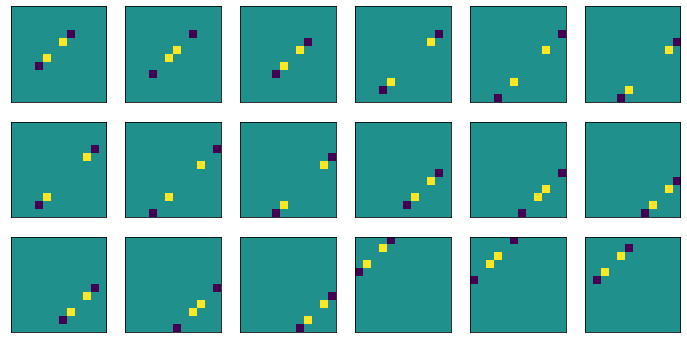

In [78]:

fig, ax = plt.subplots(3, 6, figsize=(12, 6))
for i in range(3):
    for j in range(6):
        gdx = 3*i + j
        
        ax[i, j].imshow(L_list[gdx].T)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        
plt.show()

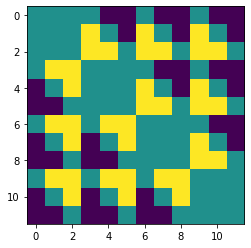

In [79]:
plt.imshow(ALL_L.T)
plt.show()

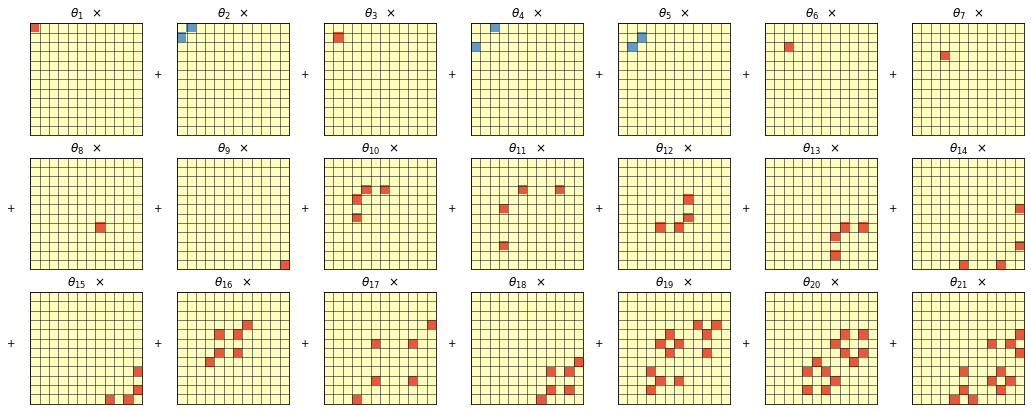

In [80]:

fig, ax = plt.subplots(3, 7, figsize=(18, 7))
for i in range(3):
    for j in range(7):
        gdx = 7*i + j
        
        ax[i, j].imshow(H_list[gdx].T, vmin=-3, vmax=+3, cmap = "RdYlBu_r", extent=(-0.5, 11.5, -0.5, 11.5))
        #ax[i, j].set_xticks([])
        #ax[i, j].set_yticks([])
        ax[i, j].set_xticks([idx-0.5 for idx in np.linspace(0, 12, 13, endpoint=True)])
        ax[i, j].set_yticks([idx-0.5 for idx in np.linspace(0, 12, 13, endpoint=True)])
        ax[i, j].set_xticklabels([])
        ax[i, j].set_yticklabels([])
        
        for tick in ax[i,j].xaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
        for tick in ax[i,j].yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
        
        #ax[i, j].set_title(r'$\theta_{%s}$' % str(gdx) + '\n' + r'$\times$' )
        #ax[i, j].set_title(r'$\theta_{%s} \;\;\times$' % str(gdx + 1))
        ax[i, j].set_title(r'$\theta_{%s} \;\;\times$' % str(gdx + 1))
        ax[i, j].grid(color='black', linewidth=0.5)

        if gdx > 0:
            ax[i, j].set_ylabel(r'+     ', rotation=0)

        
        #print(H_list[gdx].sum())
        #if gdx < 12:
        #    ax2 = ax[i, j].twinx()
        #    ax2.set_ylabel(r'     +', rotation=0)
        #    ax2.set_yticks([])
            
#plt.show()
plt.savefig("/home/sam/Documents/papers/robust_constrained_DKI/figures/H_matrix.pdf", bbox_inches='tight')

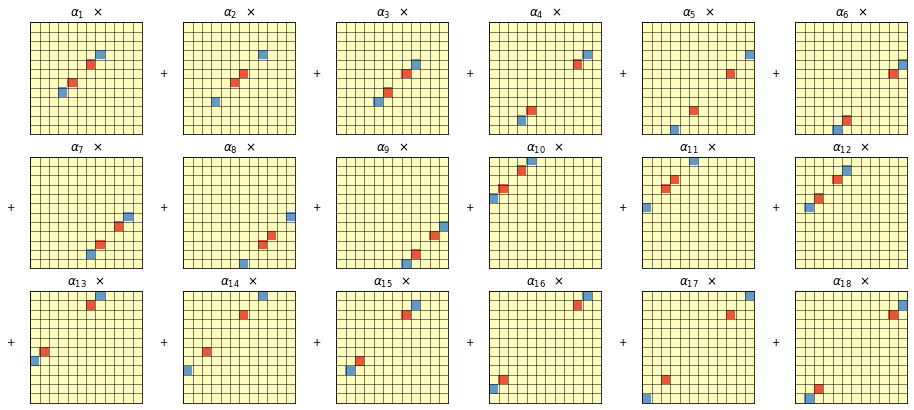

In [81]:

fig, ax = plt.subplots(3, 6, figsize=(16, 7))
for i in range(3):
    for j in range(6):
        gdx = 6*i + j
        
        ax[i, j].imshow(L_list[gdx].T, vmin=-1.5, vmax=+1.5, cmap = "RdYlBu_r", extent=(-0.5, 11.5, -0.5, 11.5))
        #ax[i, j].set_xticks([])
        #ax[i, j].set_yticks([])
        ax[i, j].set_xticks([idx-0.5 for idx in np.linspace(0, 12, 13, endpoint=True)])
        ax[i, j].set_yticks([idx-0.5 for idx in np.linspace(0, 12, 13, endpoint=True)])
        ax[i, j].set_xticklabels([])
        ax[i, j].set_yticklabels([])
        
        for tick in ax[i,j].xaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
        for tick in ax[i,j].yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
        
        #ax[i, j].set_title(r'$\theta_{%s}$' % str(gdx) + '\n' + r'$\times$' )
        #ax[i, j].set_title(r'$\theta_{%s} \;\;\times$' % str(gdx + 1))
        ax[i, j].set_title(r'$\alpha_{%s} \;\;\times$' % str(gdx + 1))
        ax[i, j].grid(color='black', linewidth=0.5)

        if gdx > 0:
            ax[i, j].set_ylabel(r'+     ', rotation=0)

        
        #print(H_list[gdx].sum())
        #if gdx < 12:
        #    ax2 = ax[i, j].twinx()
        #    ax2.set_ylabel(r'     +', rotation=0)
        #    ax2.set_yticks([])
            
#plt.show()
plt.savefig("/home/sam/Documents/papers/robust_constrained_DKI/figures/L_matrix.pdf", bbox_inches='tight')

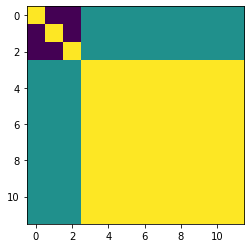

In [82]:
ALL_H = ZEROS.copy()
for H in H_list:
    ALL_H += H

plt.imshow(ALL_H.T)
plt.show()

In [83]:
ALL_H_sym = matrix(ZEROS.copy())
for hdx, H in enumerate(H_list):
    ALL_H_sym += matrix(H)* var('w'+str(hdx+1))
ALL_H_sym

[ 2*w1 -2*w2 -2*w4     0     0     0     0     0     0     0     0     0]
[-2*w2  2*w3 -2*w5     0     0     0     0     0     0     0     0     0]
[-2*w4 -2*w5  2*w6     0     0     0     0     0     0     0     0     0]
[    0     0     0  2*w7 2*w10 2*w11 2*w10 2*w16 2*w19 2*w11 2*w19 2*w17]
[    0     0     0 2*w10 2*w16 2*w19 2*w16 2*w12 2*w20 2*w19 2*w20 2*w21]
[    0     0     0 2*w11 2*w19 2*w17 2*w19 2*w20 2*w21 2*w17 2*w21 2*w14]
[    0     0     0 2*w10 2*w16 2*w19 2*w16 2*w12 2*w20 2*w19 2*w20 2*w21]
[    0     0     0 2*w16 2*w12 2*w20 2*w12  2*w8 2*w13 2*w20 2*w13 2*w18]
[    0     0     0 2*w19 2*w20 2*w21 2*w20 2*w13 2*w18 2*w21 2*w18 2*w15]
[    0     0     0 2*w11 2*w19 2*w17 2*w19 2*w20 2*w21 2*w17 2*w21 2*w14]
[    0     0     0 2*w19 2*w20 2*w21 2*w20 2*w13 2*w18 2*w21 2*w18 2*w15]
[    0     0     0 2*w17 2*w21 2*w14 2*w21 2*w18 2*w15 2*w14 2*w15  2*w9]

In [84]:
ALL_L_sym = matrix(ZEROS.copy())
for ldx, L in enumerate(L_list):
    ALL_L_sym += matrix(L)* var('a'+str(ldx+1))
ALL_L_sym

[   0    0    0    0 -a10 -a11    0 -a13 -a14    0 -a16 -a17]
[   0    0    0  a10    0 -a12  a13    0 -a15  a16    0 -a18]
[   0    0    0  a11  a12    0  a14  a15    0  a17  a18    0]
[   0  a10  a11    0    0    0    0  -a1  -a2    0  -a4  -a5]
[-a10    0  a12    0    0    0   a1    0  -a3   a4    0  -a6]
[-a11 -a12    0    0    0    0   a2   a3    0   a5   a6    0]
[   0  a13  a14    0   a1   a2    0    0    0    0  -a7  -a8]
[-a13    0  a15  -a1    0   a3    0    0    0   a7    0  -a9]
[-a14 -a15    0  -a2  -a3    0    0    0    0   a8   a9    0]
[   0  a16  a17    0   a4   a5    0   a7   a8    0    0    0]
[-a16    0  a18  -a4    0   a6  -a7    0   a9    0    0    0]
[-a17 -a18    0  -a5  -a6    0  -a8  -a9    0    0    0    0]

In [85]:
ALL = [ZEROS.copy(),] + H_list + [ZEROS.copy(),] + L_list  # Tom has a H_list for the intercept, which was all zero
# it may be that this is required... worth checking if this is true though, can we leave it out?

In [86]:
H_all = np.vstack(H_list)
print(H_all.min(), H_all.max())

-2 2


In [38]:
len(ALL) - 9  # I thought I had same H_list length, but 9 more in the L_list

32

In [39]:
# I should take the 'zero matrix at the front away, and replace it above'

len(H_list)

21

In [40]:
len(L_list)

18

In [41]:
# need to stack the matrics on top of eachother

ALL_stack = np.vstack(ALL)
print(ALL_stack.shape)

# <class 'scipy.sparse._csr.csr_matrix'>
ALL_stack = sparse.csr_matrix(ALL_stack)


(492, 12)


In [42]:
type(ALL_stack)

<class 'scipy.sparse.csr.csr_matrix'>

In [43]:
ALL_stack

<492x12 sparse matrix of type '<class 'numpy.longlong'>'
	with 162 stored elements in Compressed Sparse Row format>

In [44]:
sparse.save_npz("dki_constraint_SC.npz", ALL_stack)

In [45]:
test = np.load("dki_constraint_SC.npz")

In [46]:
test = sparse.load_npz("dki_constraint_SC.npz")